In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import cProfile, pstats

In [4]:
om = pd.read_pickle('~/Downloads/omnyex_processed_for_profiling.pkl')
X = om.drop('chargeback', axis=1)
y = om['chargeback']

In [5]:
X = X.astype(float)

In [6]:
X_rules = (X >= 1).astype(int)

In [7]:
from rule_filtering.rule_filters import GreedyFilter
from rule_optimisation.optimisation_functions import Precision, FScore

In [8]:
X_rules.shape

(1780373, 50)

In [9]:
f1 = FScore(1)

In [10]:
params = {
    'opt_func': f1.fit
}

In [11]:
# rs = GreedyFilter(**params)
# rs.fit(X_rules, y)

In [12]:
# rs.rules_to_keep

## Old

In [14]:
filename = 'GreedyFilter_old.dat'

In [15]:
# rs = GreedyFilter(**params)
# cProfile.run('rs.fit(X_rules, y)', sort='cumtime', filename=f'{filename}.dat')

In [16]:
p = pstats.Stats(f'{filename}.dat')
p.sort_stats('cumtime').print_stats()

Tue Jan 12 14:46:12 2021    GreedyFilter_old.dat.dat

         971870 function calls (955816 primitive calls) in 26.001 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   26.001   26.001 {built-in method builtins.exec}
        1    0.000    0.000   26.001   26.001 <string>:1(<module>)
        1    0.184    0.184   26.001   26.001 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_filtering/rule_filtering/rule_filters.py:114(fit)
        1    1.818    1.818   20.728   20.728 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_filtering/rule_filtering/rule_filters.py:169(_return_performance_top_n)
       98    0.001    0.000   12.598    0.129 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/pandas/core/frame.py:2869(__getitem__)
      176    0.002    0.000   12.586    0.072 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/pandas/core/internals/managers.py:1238(reindex_indexe

## Old (with rule_descriptions provided)

In [20]:
from argo_utils.argo_utils import return_binary_pred_perf_of_set_numpy

In [21]:
rule_descriptions = return_binary_pred_perf_of_set_numpy(y_true=y, y_preds=X_rules, y_preds_columns=X_rules.columns)

In [26]:
filename = 'GreedyFilter_old_rule_descriptions_given.dat'

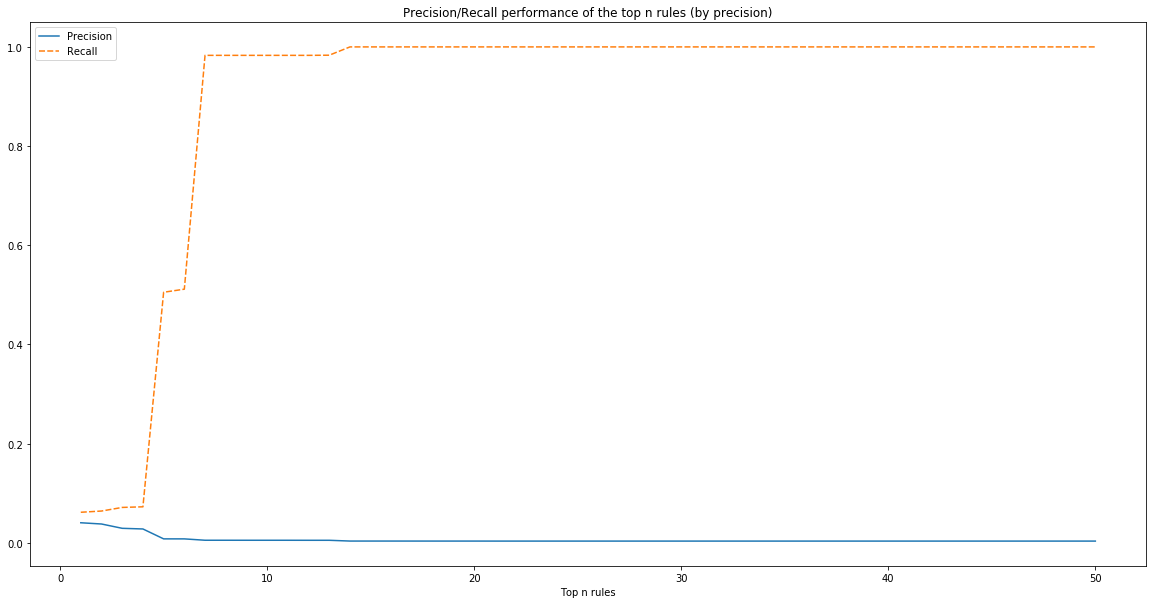

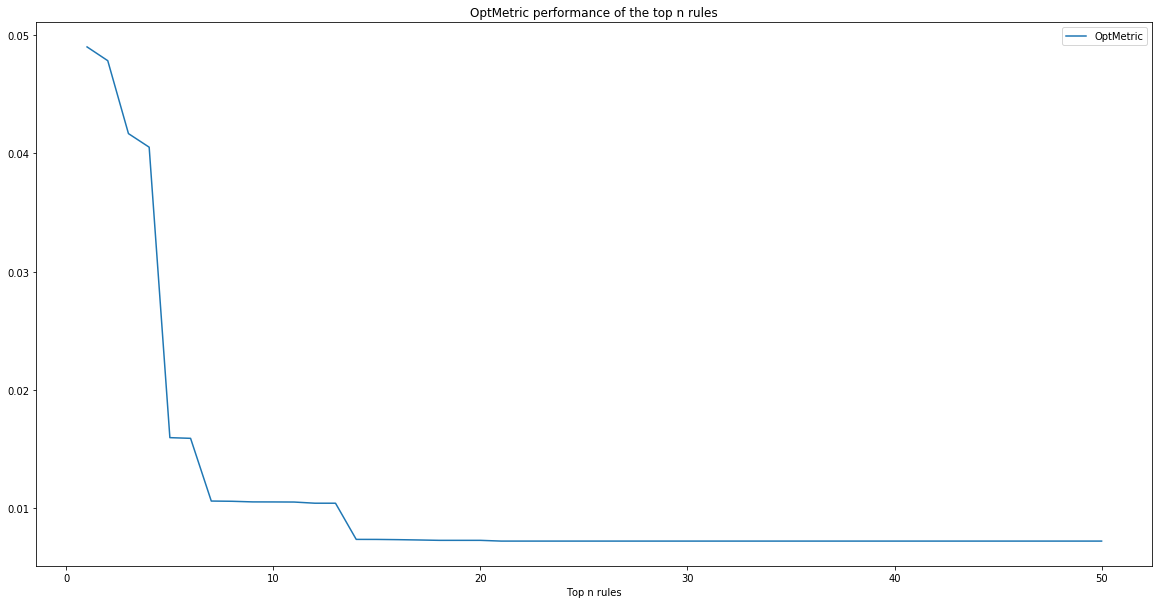

In [27]:
# rs = GreedyFilter(opt_func=f1.fit, rule_descriptions=rule_descriptions)
# cProfile.run('rs.fit(X_rules, y)', sort='cumtime', filename=f'{filename}.dat')

In [28]:
p = pstats.Stats(f'{filename}.dat')
p.sort_stats('cumtime').print_stats()

Tue Jan 12 14:57:21 2021    GreedyFilter_old_rule_descriptions_given.dat.dat

         772195 function calls (758664 primitive calls) in 21.850 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   21.850   21.850 {built-in method builtins.exec}
        1    0.000    0.000   21.850   21.850 <string>:1(<module>)
        1    0.076    0.076   21.850   21.850 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_filtering/rule_filtering/rule_filters.py:120(fit)
        1    1.813    1.813   20.644   20.644 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_filtering/rule_filtering/rule_filters.py:175(_return_performance_top_n)
       98    0.002    0.000   12.389    0.126 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/pandas/core/frame.py:2869(__getitem__)
       61    0.000    0.000   12.369    0.203 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/pandas/core/generic.py:3355(_

## New (with rule_descriptions provided)

In [29]:
filename = 'GreedyFilter_new_rule_descriptions_given.dat'

In [17]:
# rs = GreedyFilter(opt_func=f1.fit, rule_descriptions=rule_descriptions)
# cProfile.run('rs.fit(X_rules, y)', sort='cumtime', filename=f'{filename}.dat')

In [18]:
p = pstats.Stats(f'{filename}.dat')
p.sort_stats('cumtime').print_stats()

Tue Jan 12 14:46:12 2021    GreedyFilter_old.dat.dat

         971870 function calls (955816 primitive calls) in 26.001 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   26.001   26.001 {built-in method builtins.exec}
        1    0.000    0.000   26.001   26.001 <string>:1(<module>)
        1    0.184    0.184   26.001   26.001 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_filtering/rule_filtering/rule_filters.py:114(fit)
        1    1.818    1.818   20.728   20.728 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_filtering/rule_filtering/rule_filters.py:169(_return_performance_top_n)
       98    0.001    0.000   12.598    0.129 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/pandas/core/frame.py:2869(__getitem__)
      176    0.002    0.000   12.586    0.072 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/pandas/core/internals/managers.py:1238(reindex_indexe

In [33]:
%timeit rule_descriptions.index[:10]

2.89 µs ± 34.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [34]:
%timeit X_rules[rule_descriptions.index[:10]]

111 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%timeit np.bitwise_or.reduce(X_rules[rule_descriptions.index[:10]].values, axis=1)

145 ms ± 3.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
%timeit np.bitwise_or.reduce(X_rules[rule_descriptions.index[:10]].values.T, axis=0)

144 ms ± 2.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## New (with rule_descriptions provided; sorted rule_descriptions only once)

In [57]:
rule_descriptions = return_binary_pred_perf_of_set_numpy(y_true=y, y_preds=X_rules, y_preds_columns=X_rules.columns)

In [58]:
filename = 'GreedyFilter_new_rule_descriptions_given_sort_once.dat'

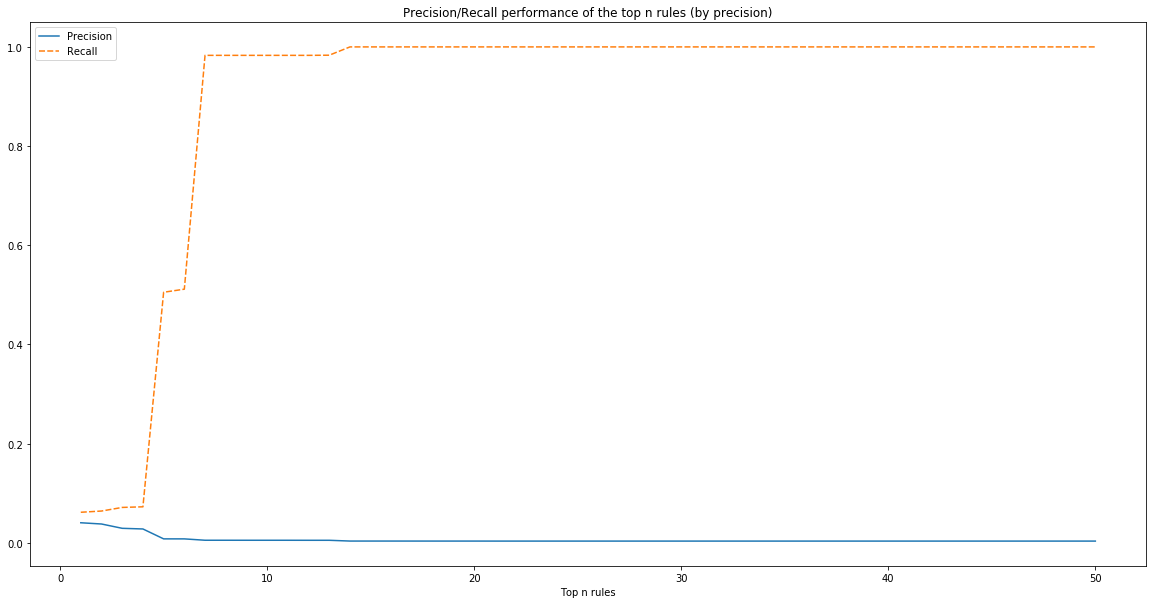

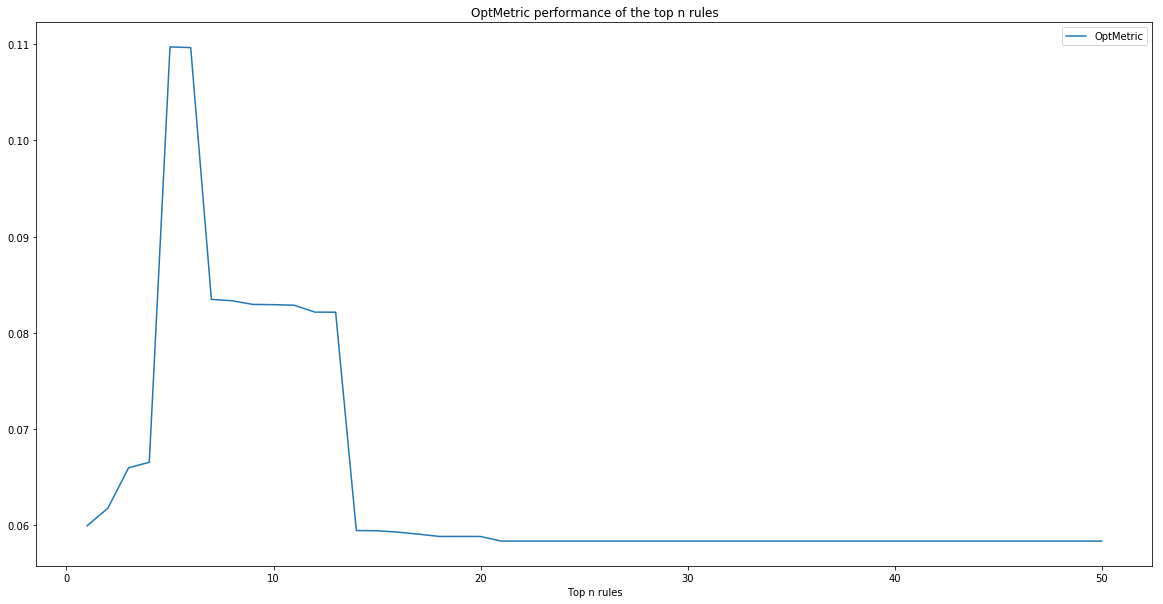

In [59]:
rs = GreedyFilter(opt_func=f1.fit, rule_descriptions=rule_descriptions)
cProfile.run('rs.fit(X_rules, y)', sort='cumtime', filename=f'{filename}.dat')

In [60]:
p = pstats.Stats(f'{filename}.dat')
p.sort_stats('cumtime').print_stats()

Tue Jan 12 16:39:38 2021    GreedyFilter_new_rule_descriptions_given_sort_once.dat.dat

         776545 function calls (762863 primitive calls) in 21.861 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   21.861   21.861 {built-in method builtins.exec}
        1    0.000    0.000   21.861   21.861 <string>:1(<module>)
        1    0.076    0.076   21.861   21.861 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_filtering/rule_filtering/rule_filters.py:119(fit)
        1    1.819    1.819   20.617   20.617 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_filtering/rule_filtering/rule_filters.py:176(_return_performance_top_n)
       97    0.001    0.000   12.762    0.132 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/pandas/core/frame.py:2869(__getitem__)
       61    0.000    0.000   12.746    0.209 /Users/jlaidler/venvs/argo/lib/python3.7/site-packages/pandas/core/generic

## New (with rule_descriptions provided; sorted rule_descriptions only once and reindex X_rules once)

In [53]:
filename = 'GreedyFilter_new_rule_descriptions_given_sort_once_X_rules_reindex.dat'

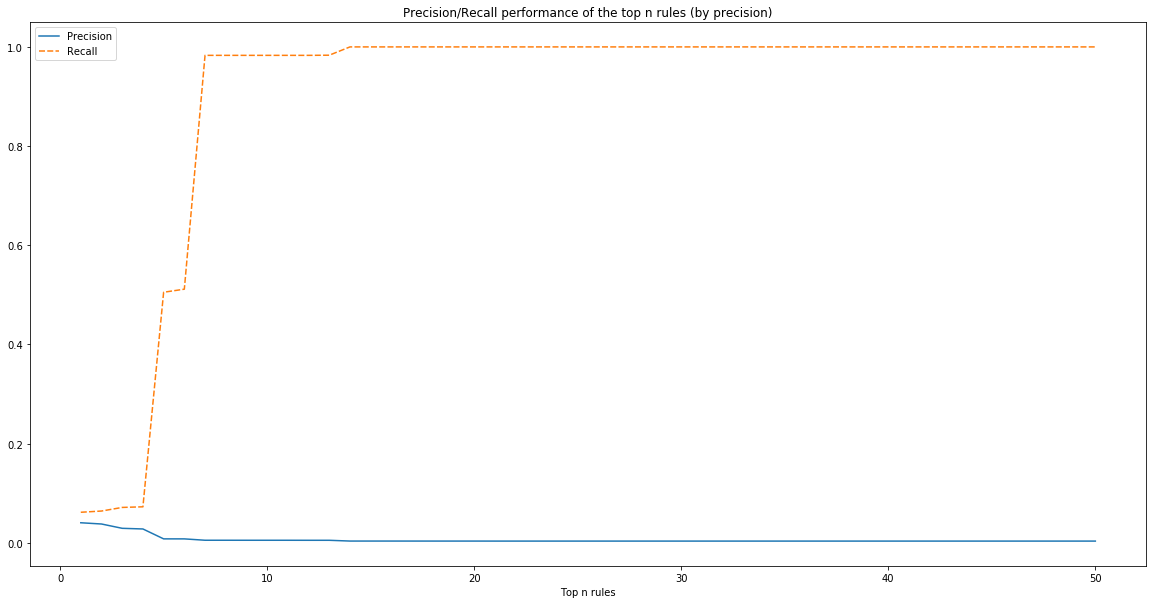

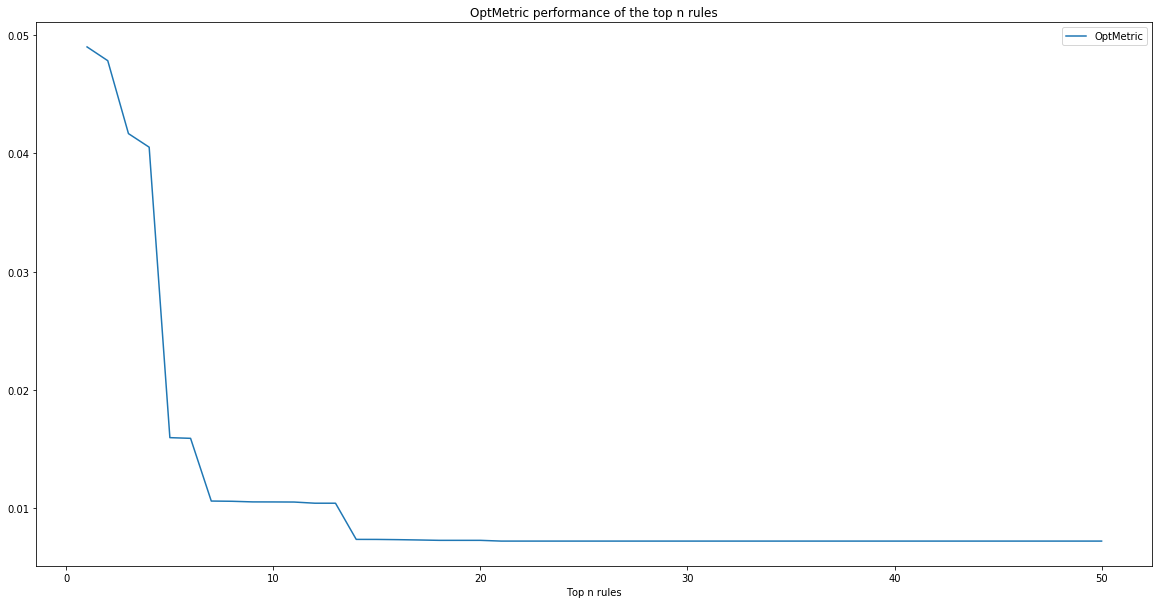

In [54]:
rs = GreedyFilter(opt_func=f1.fit, rule_descriptions=rule_descriptions)
cProfile.run('rs.fit(X_rules, y)', sort='cumtime', filename=f'{filename}.dat')

In [55]:
p = pstats.Stats(f'{filename}.dat')
p.sort_stats('cumtime').print_stats()

Wed Jan 13 09:34:00 2021    GreedyFilter_new_rule_descriptions_given_sort_once_X_rules_reindex.dat.dat

         765769 function calls (752248 primitive calls) in 7.536 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    7.536    7.536 {built-in method builtins.exec}
        1    0.000    0.000    7.535    7.535 <string>:1(<module>)
        1    0.084    0.084    7.535    7.535 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_filtering/rule_filtering/rule_filters.py:119(fit)
        1    0.134    0.134    6.142    6.142 /Users/jlaidler/Documents/tigress/tigress/argo/argo/rule_filtering/rule_filtering/rule_filters.py:176(_return_performance_top_n)
     5281    4.637    0.001    4.637    0.001 {method 'reduce' of 'numpy.ufunc' objects}
   100/50    0.443    0.004    1.424    0.028 /Users/jlaidler/Documents/tigress/tigress/argo/argo/argo_utils/argo_utils/argo_utils.py:139(return_binary_pred

In [35]:
import argo_utils.argo_utils as argo_utils

In [30]:
n=50
top_n_rule_descriptions_list = []

In [31]:
%timeit top_n_rules = rule_descriptions.index[:n]

2.86 µs ± 75 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [52]:
X_rules.iloc[:, :10]

,order_currency_code_AED,order_currency_code_ARS,order_currency_code_AUD,order_currency_code_BRL,order_currency_code_CAD,order_currency_code_CHF,order_currency_code_CLP,order_currency_code_CNY,order_currency_code_COP,order_currency_code_CZK
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1835645,0,0,0,0,0,0,0,0,0,0
1835646,0,0,0,0,0,0,0,0,0,0
1835647,0,0,0,0,0,0,0,0,0,0
1835648,0,0,0,0,0,0,0,0,0,0


In [38]:
top_n_rules = rule_descriptions.index[:n]

In [40]:
col_idxs = [X_rules.columns.get_loc(col) for col in top_n_rules ]

In [49]:
%timeit X_rules.reindex(rule_descriptions.index, axis=1)

558 ms ± 30.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
%timeit top_n_X_rules = X_rules.values[:, col_idxs]

479 ms ± 14.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
%timeit top_n_X_rules = X_rules[top_n_rules]

483 ms ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%timeit top_n_combined = np.bitwise_or.reduce(top_n_X_rules.values, axis=1)

150 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
%timeit top_n_rule_descriptions_list.append(argo_utils.return_binary_pred_perf_of_set_numpy(y_true=y, y_preds=top_n_combined, y_preds_columns=[n], sample_weight=None, opt_func=f1.fit))

27.3 ms ± 854 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Unit testing

In [8]:
import random

In [9]:
def return_random_num(y, fraud_min, fraud_max, nonfraud_min, nonfraud_max, rand_func):
    data = [rand_func(fraud_min, fraud_max) if i == 1 else rand_func(
        nonfraud_min, nonfraud_max) for i in y]
    return data

random.seed(0)
np.random.seed(0)
y = pd.Series(data=[0]*980 + [1]*20, index=list(range(0, 1000)))
X_rules = pd.DataFrame(data={
    "Rule1": [0]*980 + [1]*6 + [0] * 14,
    "Rule2": [0]*987 + [1]*6 + [0] * 7,
    "Rule3": [0]*993 + [1]*6 + [0] * 1,
    "Rule4": [round(max(i, 0)) for i in return_random_num(y, 0.4, 1, 0.5, 0.6, np.random.uniform)],
    "Rule5": [round(max(i, 0)) for i in return_random_num(y, 0.2, 1, 0, 0.6, np.random.uniform)],
},
    index=list(range(0, 1000))
)
weights = y.apply(lambda x: 10 if x == 1 else 1)

In [10]:
from argo_utils.argo_utils import return_binary_pred_perf_of_set_numpy

In [11]:
f1 = FScore(4)

In [12]:
rule_descriptions = return_binary_pred_perf_of_set_numpy(y_true=y, y_preds=X_rules, y_preds_columns=X_rules.columns, opt_func=f1.fit)

In [13]:
rule_descriptions

,Precision,Recall,PercDataFlagged,OptMetric
Rule1,1.000000,0.30,0.006,0.312883
Rule2,1.000000,0.30,0.006,0.312883
Rule3,1.000000,0.30,0.006,0.312883
Rule4,0.018036,0.90,0.998,0.232170
Rule5,0.075377,0.75,0.199,0.491329


In [14]:
f1 = FScore(beta=4)

In [15]:
precision = Precision()

In [40]:
gf_wo_rd_no_weight = GreedyFilter(opt_func=f1.fit, sorting_col='Precision', show_plots=True)

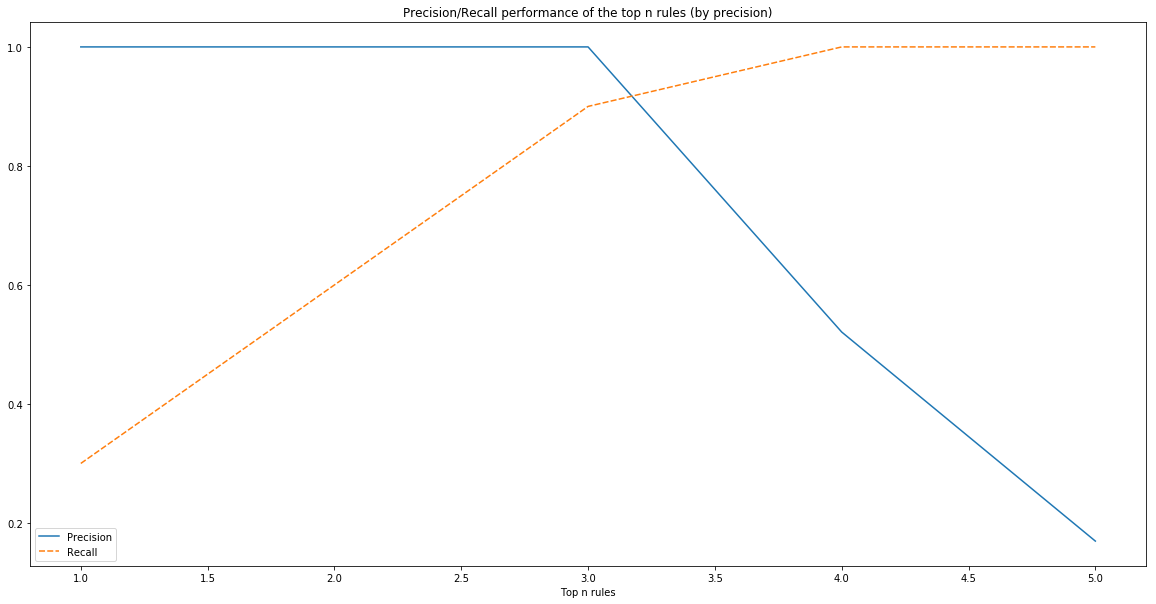

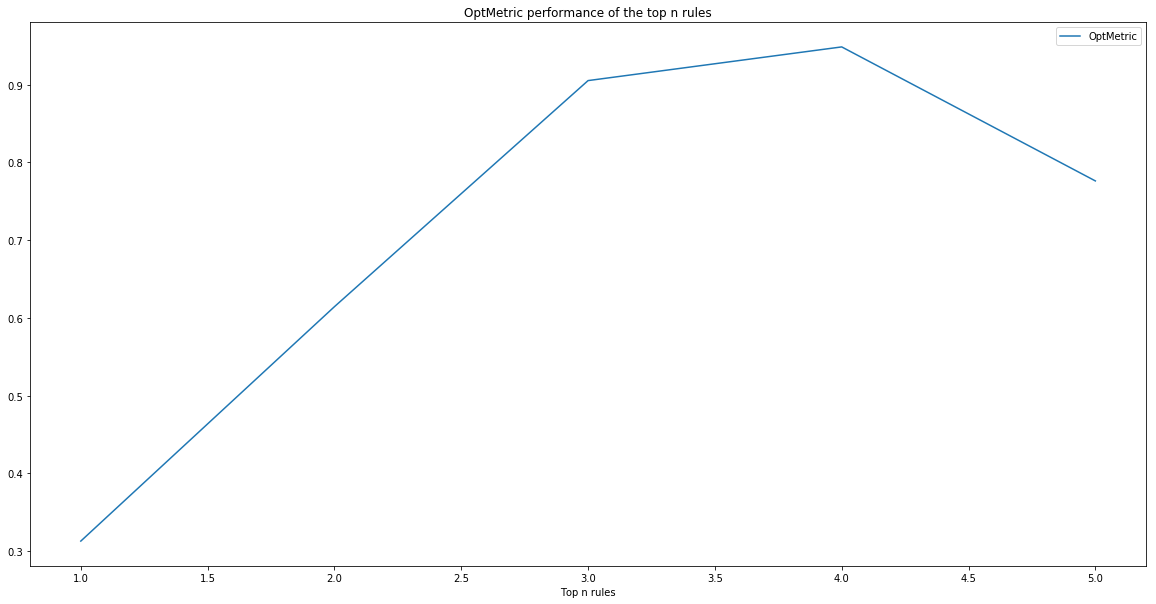

In [20]:
gf_wo_rd_no_weight.fit(X_rules=X_rules, y=y, sample_weight=weights)

In [21]:
gf_wo_rd_no_weight.rules_to_keep

['Rule1', 'Rule2', 'Rule3', 'Rule5']

In [23]:
gf_wo_rd_no_weight.rule_descriptions

,Precision,Recall,PercDataFlagged,OptMetric
Rule1,1.000000,0.30,0.006,0.312883
Rule2,1.000000,0.30,0.006,0.312883
Rule3,1.000000,0.30,0.006,0.312883
Rule5,0.449102,0.75,0.199,0.721562
Rule4,0.155172,0.90,0.998,0.701835


In [24]:
gf_wo_rd_no_weight.top_n_rule_descriptions

,Precision,Recall,PercDataFlagged,OptMetric
Top n rules,,,,
1,1.000000,0.3,0.006,0.312883
2,1.000000,0.6,0.012,0.614458
3,1.000000,0.9,0.018,0.905325
4,0.520833,1.0,0.204,0.948661
5,0.169492,1.0,1.000,0.776256


In [61]:
top_n_rd = gf_w_rd_no_weight._return_performance_top_n(rule_descriptions, X_rules, y,
                                  sample_weight= weights, opt_func=f1.fit, sorting_col='Precision')

NameError: name 'gf_w_rd_no_weight' is not defined

In [62]:
top_n_rd.to_dict()

NameError: name 'top_n_rd' is not defined

In [30]:
def instantiate_GreedyFilter():
#     rd_no_weight, rd_weight = return_rule_descriptions
    # f1 = FScore(beta=1)
    f1 = FScore(beta=4)
#     gf_w_rd_no_weight = GreedyFilter(
#         # opt_func=f1.fit, rule_descriptions=rd_no_weight, sorting_col='OptMetric', show_plots=False)
#         opt_func=f1.fit, rule_descriptions=rd_no_weight, sorting_col='Precision', show_plots=False)
#     gf_w_rd_weight = GreedyFilter(
#         # opt_func=f1.fit, rule_descriptions=rd_weight, sorting_col='OptMetric', show_plots=False)
#         opt_func=f1.fit, rule_descriptions=rd_weight, sorting_col='Precision', show_plots=False)
    gf_wo_rd_no_weight = GreedyFilter(
        # opt_func=f1.fit, sorting_col='OptMetric', show_plots=False)
        opt_func=f1.fit, sorting_col='Precision', show_plots=True)
    gf_wo_rd_weight = GreedyFilter(
        # opt_func=f1.fit, sorting_col='OptMetric', show_plots=False)
        opt_func=f1.fit, sorting_col='Precision', show_plots=True)
    return gf_wo_rd_no_weight, gf_wo_rd_weight


def expected_results_GreedyFilter():
    expected_results = [
        # X_rules[['Rule1', 'Rule2', 'Rule3']],
        X_rules[['Rule5', 'Rule1', 'Rule2']],
        # X_rules[['Rule5', 'Rule1', 'Rule2']]
        X_rules[['Rule5', 'Rule4', 'Rule1', 'Rule2']]
    ]
    return expected_results


def expected_results_return_performance_top_n():
    top_n_no_weight = pd.DataFrame(
        # {
        #     'Precision': {1: 1.0, 2: 1.0, 3: 1.0, 4: 0.09803921568627451, 5: 0.02},
        #     'Recall': {1: 0.3, 2: 0.6, 3: 0.9, 4: 1.0, 5: 1.0},
        #     'PercDataFlagged': {1: 0.006, 2: 0.012, 3: 0.018, 4: 0.204, 5: 1.0},
        #     'OptMetric': {1: 0.4615384615384615, 2: 0.7499999999999999, 3: 0.9473684210526316, 4: 0.17857142857142855, 5: 0.0392156862745098}
        # }
        {'Precision': {1: 1.0, 2: 1.0, 3: 1.0, 4: 0.09803921568627451, 5: 0.02},
         'Recall': {1: 0.3, 2: 0.6, 3: 0.9, 4: 1.0, 5: 1.0},
         'PercDataFlagged': {1: 0.006, 2: 0.012, 3: 0.018, 4: 0.204, 5: 1.0},
         'OptMetric': {1: 0.31288343558282206,
                       2: 0.6144578313253012,
                       3: 0.9053254437869824,
                       4: 0.648854961832061,
                       5: 0.25757575757575757}}
    )
    top_n_weight = pd.DataFrame(
        # {
        #     'Precision': {1: 0.4491017964071856, 2: 0.480225988700565, 3: 0.5208333333333334, 4: 0.5208333333333334, 5: 0.1694915254237288},
        #     'Recall': {1: 0.75, 2: 0.85, 3: 1.0, 4: 1.0, 5: 1.0},
        #     'PercDataFlagged': {1: 0.199, 2: 0.201, 3: 0.204, 4: 0.204, 5: 1.0},
        #     'OptMetric': {1: 0.5617977528089887, 2: 0.6137184115523465, 3: 0.684931506849315, 4: 0.684931506849315, 5: 0.2898550724637681}
        # }
        {'Precision': {1: 1.0,
                       2: 1.0,
                       3: 1.0,
                       4: 0.5208333333333334,
                       5: 0.1694915254237288},
         'Recall': {1: 0.3, 2: 0.6, 3: 0.9, 4: 1.0, 5: 1.0},
         'PercDataFlagged': {1: 0.006, 2: 0.012, 3: 0.018, 4: 0.204, 5: 1.0},
         'OptMetric': {1: 0.31288343558282206,
                       2: 0.6144578313253012,
                       3: 0.9053254437869824,
                       4: 0.9486607142857143,
                       5: 0.776255707762557}}
    )
    top_n_no_weight.index.name = 'Top n rules'
    top_n_weight.index.name = 'Top n rules'
    return top_n_no_weight, top_n_weight

In [32]:
gf_wo_rd_no_weight, gf_wo_rd_weight = instantiate_GreedyFilter()

In [33]:
X_rules_noweight, X_rules_weight = expected_results_GreedyFilter()

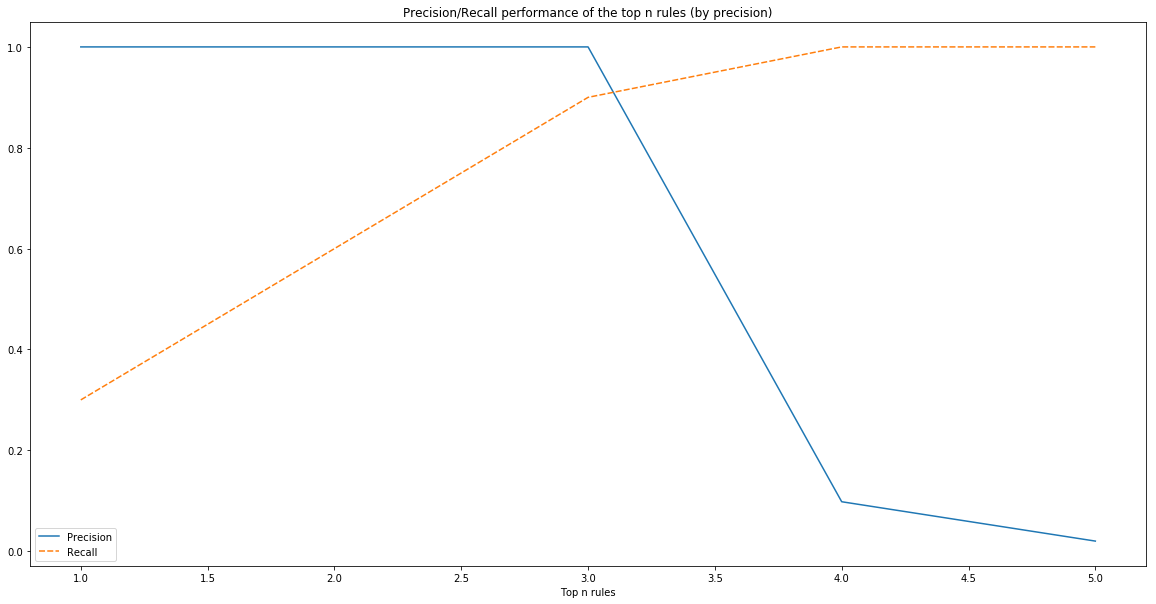

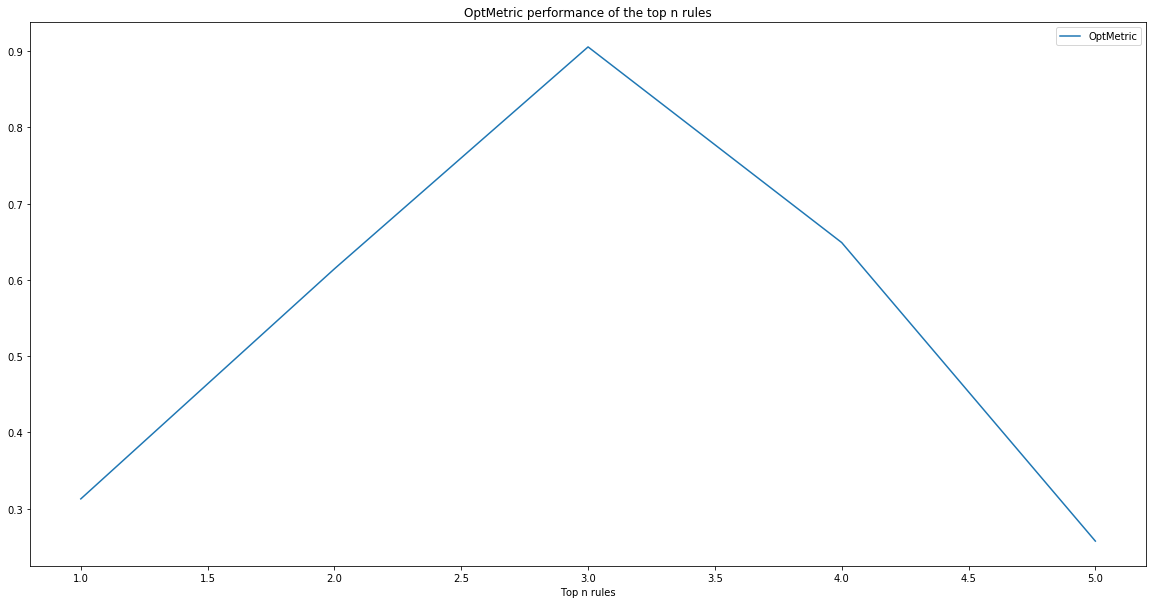

In [34]:
gf_wo_rd_no_weight.fit(X_rules=X_rules, y=y)

In [35]:
gf_wo_rd_no_weight.rules_to_keep

['Rule1', 'Rule2', 'Rule3']

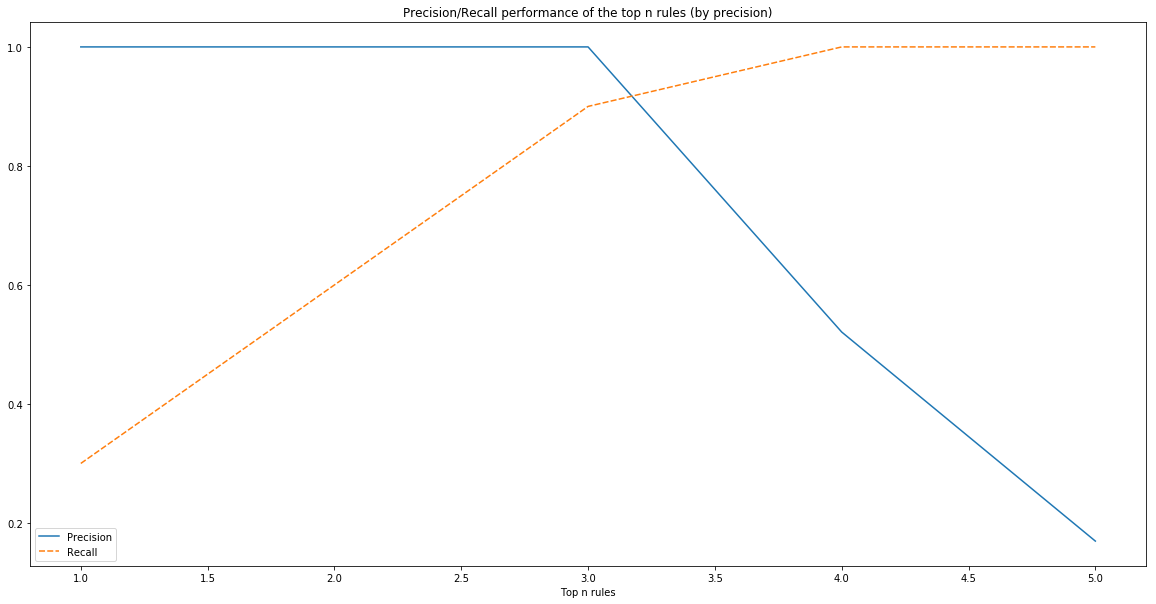

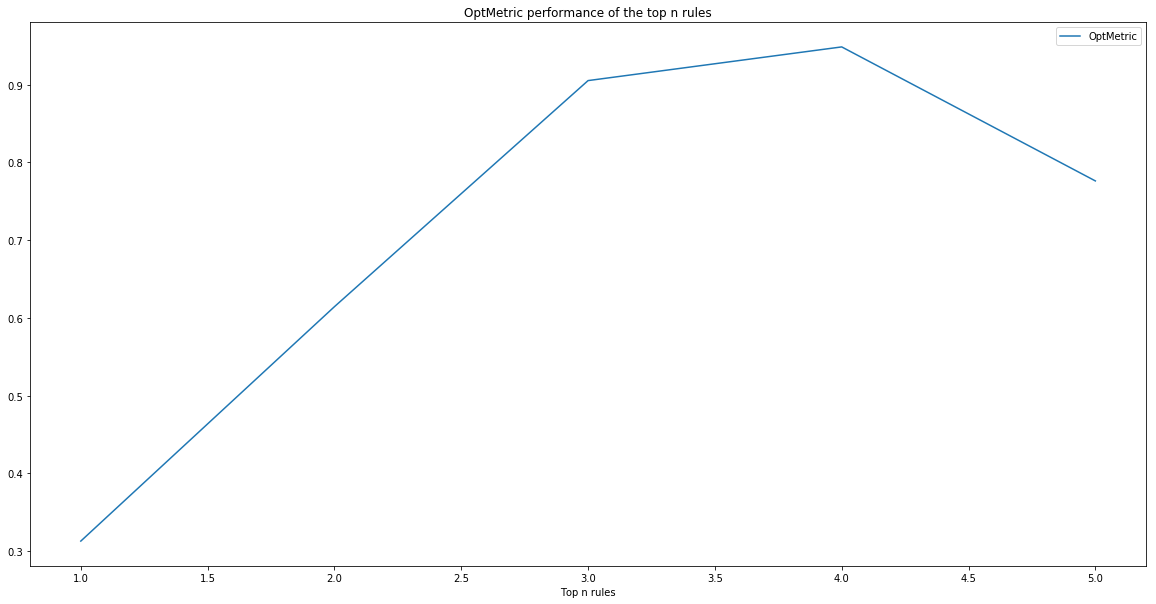

In [39]:
gf_wo_rd_weight.fit(X_rules=X_rules, y=y, sample_weight=weights)

In [31]:
gf_wo_rd_no_weight.top_n_rule_descriptions

,Precision,Recall,PercDataFlagged,OptMetric
Top n rules,,,,
1,1.000000,0.3,0.006,0.312883
2,1.000000,0.6,0.012,0.614458
3,1.000000,0.9,0.018,0.905325
4,0.098039,1.0,0.204,0.648855
5,0.020000,1.0,1.000,0.257576


In [32]:
gf_wo_rd_no_weight.rule_descriptions

,Precision,Recall,PercDataFlagged,OptMetric
Rule1,1.000000,0.30,0.006,0.312883
Rule2,1.000000,0.30,0.006,0.312883
Rule3,1.000000,0.30,0.006,0.312883
Rule5,0.075377,0.75,0.199,0.491329
Rule4,0.018036,0.90,0.998,0.232170
